<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Kernel%20Machines/AIML_CEP_Kernel_machines_TA_session_06Nov2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Large{\text{Kernel machines}}$ 

Let us first generate a synthetic data set to illustrate the behavior of different kernels.

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
X,y = make_moons(n_samples=200, shuffle=True, noise=0.1, random_state=42)
print ('first five target values before changing 0 to -1')
# print (sum(y))
print (y[0:5])
y = np.where(y >=1,y,-1)
print('moon data shape:', np.shape(X))

#check the shape of moon target labels
print('moon target shape:', np.shape(y))
#We can print first 5 samples of moon data and check 
print('Features of first five samples of moon data:')
print(X[0:5,])
print ('first five target values after changing 0 to -1')
print (y[0:5])

first five target values before changing 0 to -1
[0 0 0 1 1]
moon data shape: (200, 2)
moon target shape: (200,)
Features of first five samples of moon data:
[[-1.04942573  0.08444263]
 [ 0.92281755  0.45748851]
 [ 0.65678659  0.69959669]
 [ 1.1889402  -0.38652807]
 [ 0.28926455 -0.13774489]]
first five target values after changing 0 to -1
[-1 -1 -1  1  1]


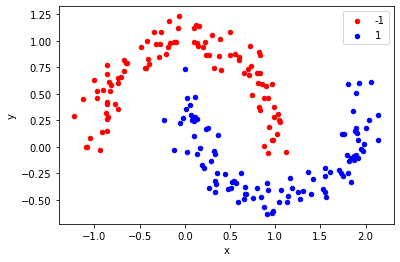

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# scatter plot, dots colored by class value

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
   group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

$\large{\text{Kernel trick}}$

Fortunately, finding a suitable choice of $\Phi$ transformation can be by-passed if we can find a suitable kernel function $K$ such that the dot product $\Phi(\mathbf{u})^\top \Phi(\mathbf{z})$ can be represented as $K(\mathbf{u},\mathbf{z})$. 

Indeed, this is possible using a result known as $\textbf{Mercer's theorem}$.

$\large{\text{Mercer's theorem}}$

$K$ satisfies:

$
\begin{align}
\int K(\mathbf{u}, \mathbf{z}) g(\mathbf{u}) g(\mathbf{z}) d\mathbf{u} d\mathbf{z} \geq 0 
\end{align}
$

for any function $g$ satisfying $\int g^2(\mathbf{u}) d\mathbf{u} < \infty$, if and only if  $K$ corresponds to a unique transformation $\Phi$ such that $K( \mathbf{u}, \mathbf{z}) = \Phi(\mathbf{u})^\top \Phi(\mathbf{z})$.  

Several possible choices of $K$ exist. Some examples are:



*   Polynomial kernel: $K(\mathbf{u}, \mathbf{z}) = (\mathbf{u}^\top \mathbf{z} + 1)^p$ 
*   Gaussian kernel (or) radial basis function (rbf) kernel: $K(\mathbf{u}, \mathbf{z}) = e^{-\frac{\|\mathbf{u}-\mathbf{z}\|^2}{2\sigma^2}}$

In [ ]:
np.random.seed(1000)
num_samples = len(X)
#Create an index array 
indexarr = np.arange(num_samples) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*num_samples)
#Use the remaining 20% samples for testing 
num_test = num_samples-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  160 num_test:  40


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_X = X[indexarr[0:num_train]]
train_y = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

# print (sum(x <= 0 for x in train_y))

shape of train data features:
(160, 2)
shape of train data labels
(160,)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_X = X[indexarr[num_train:num_samples]]
test_y = y[indexarr[num_train:num_samples]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(40, 2)
shape of test data labels
(40,)


$\Large{\text{Finding best hyperparameter } \gamma \ \text{using cross validation}}$

Question: What is cross validation?

Answer: Cross validation (CV) is a technique employed to best tune the hyperparameters of a machine learning algorithm. The k-fold cross validation splits the data into k folds. The samples in $k-1$ folds are used in training phase and the remaining fold is treated as test set. The scores are computed at every iteration of CV and then the hyperparameter associated with highest average score is chosen for the testing purpose.

#Visualizing the working procedure of k-fold cross validation
![k-fold cross validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Image credit:  $\texttt{https://scikit-learn.org/stable/_images/grid_search_cross_validation.png} $

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

gammas = [0.0001,0.001, 0.01, 0.1, 1, 20, 40, 60, 80, 100]
kernels = ['sigmoid','linear', 'poly', 'rbf']
best_gamma = {}
cv_k = 5 #5-fold cross validation
for kernel_ in kernels:
  print (kernel_,'kernel')
  avg_score = np.zeros(len(gammas))
  for gamma in gammas:
    clf = SVC(kernel=kernel_, gamma=gamma, random_state=1)
    scores = cross_val_score(clf, train_X, train_y, cv=cv_k) 
    avg_score[gammas.index(gamma)] = np.mean(scores)
    # print ('average score for kernel',kernel_, 'at gamma = ', gamma,'is',avg_score[gammas.index(gamma)])
  print (avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_gamma[kernel_] = gammas[int(max_score_index)]

print ('best hyperparameters = ', best_gamma)

sigmoid kernel
[0.5125  0.5125  0.8     0.85625 0.65625 0.575   0.5625  0.55625 0.55625
 0.55625]
linear kernel
[0.8625 0.8625 0.8625 0.8625 0.8625 0.8625 0.8625 0.8625 0.8625 0.8625]
poly kernel
[0.5125 0.5125 0.5125 0.6125 0.925  0.925  0.925  0.925  0.925  0.9125]
rbf kernel
[0.5125  0.5125  0.825   0.85625 0.98125 0.99375 0.99375 0.99375 1.
 1.     ]
best hyperparameters =  {'sigmoid': 0.1, 'linear': 0.0001, 'poly': 1, 'rbf': 80}


Now let us try to use four different kernels with above learned hyperparameters on moon data set. 

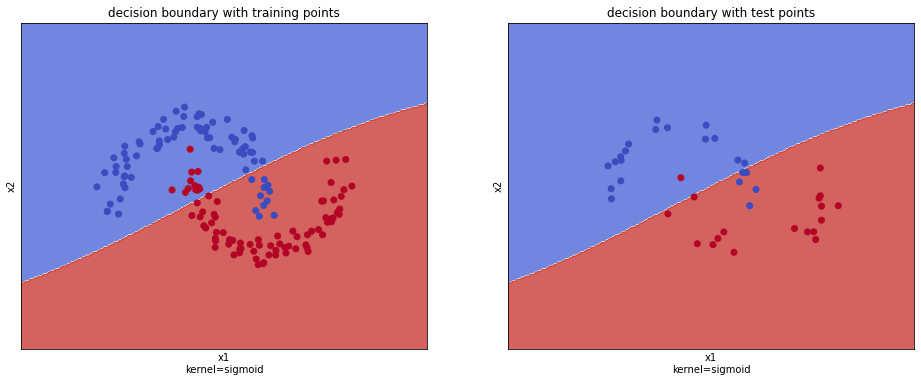

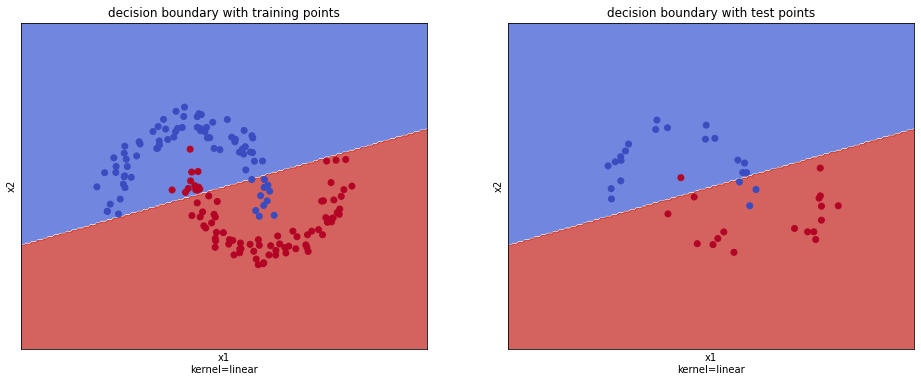

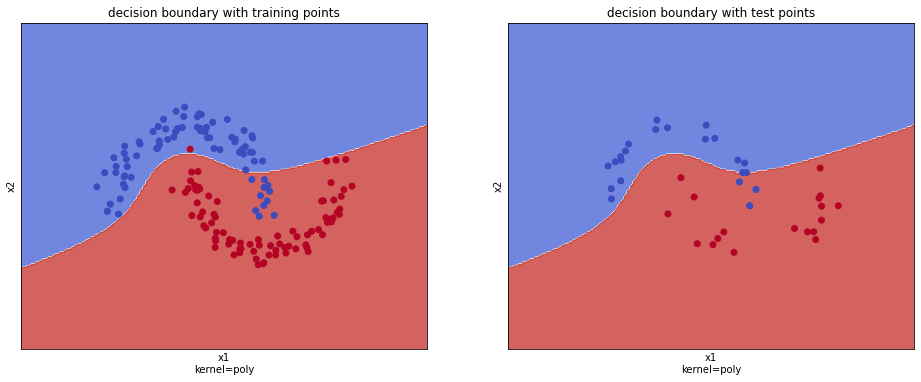

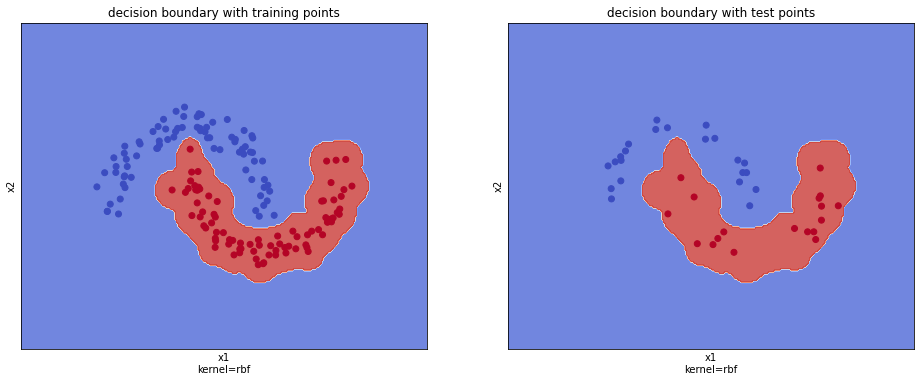

train accuracy: {'sigmoid': 85.625, 'linear': 85.625, 'poly': 92.5, 'rbf': 100.0}
test accuracy: {'sigmoid': 85.0, 'linear': 90.0, 'poly': 87.5, 'rbf': 100.0}


In [ ]:
# for creating a mesh to plot in
h=0.02 #mesh step size
num_samples = len(X)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

from sklearn.svm import SVC
train_accuracy = {}
test_accuracy = {}
for kernel_ in kernels:
  clf = SVC(kernel=kernel_,gamma=best_gamma[kernel_],max_iter = 10000)
  clf_model = clf.fit(train_X,train_y.ravel())
  predicted_labels_train = clf_model.predict(train_X)
  # print(predicted_labels)
  train_error = np.sum(0.5*np.abs(predicted_labels_train-train_y.ravel()))/len(train_y)*100.0
  train_accuracy[kernel_] = 100.0-train_error 

  predicted_labels_test = clf_model.predict(test_X)
  # print(predicted_labels)
  test_error = np.sum(0.5*np.abs(predicted_labels_test-test_y.ravel()))/len(test_y)*100.0
  test_accuracy[kernel_] = 100.0-test_error 
 
  ## visualizing decision boundary
  Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx1.shape)

  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
  ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
  # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
  # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
  xlabel = 'x1' + str('\n')+'kernel='+str(kernel_)
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel('x2')
  ax1.set_xlim(xx1.min(), xx1.max())
  ax1.set_ylim(xx2.min(), xx2.max())
  ax1.set_xticks(())
  ax1.set_yticks(())
  ax1.set_title('decision boundary with training points')

  #plot the test points along with decision boundaries
  ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the test points
  ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
  # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
  # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
  xlabel = 'x1' + str('\n')+'kernel='+str(kernel_)
  ax2.set_xlabel(xlabel)
  ax2.set_ylabel('x2')
  ax2.set_xlim(xx1.min(), xx1.max())
  ax2.set_ylim(xx2.min(), xx2.max())
  ax2.set_xticks(())
  ax2.set_yticks(())
  ax2.set_title('decision boundary with test points')


  plt.show()

print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)

#Let us now check the decision boundaries for RBF kernel with different $\gamma$ values 

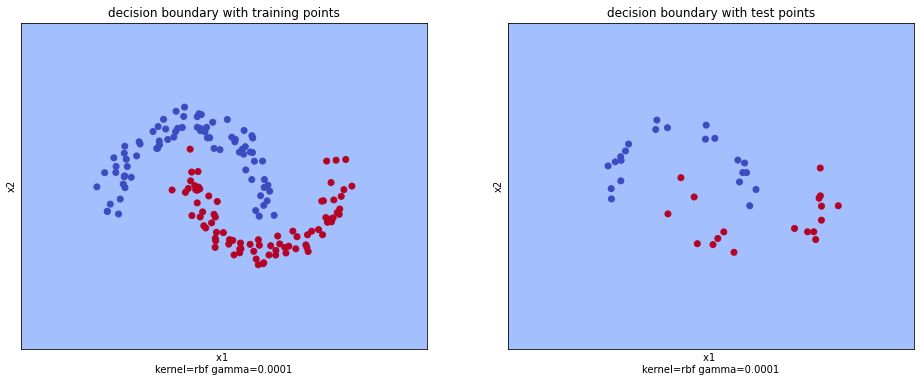

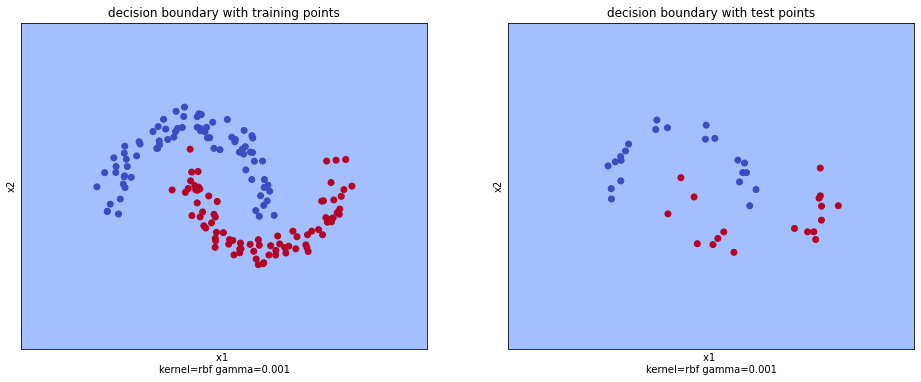

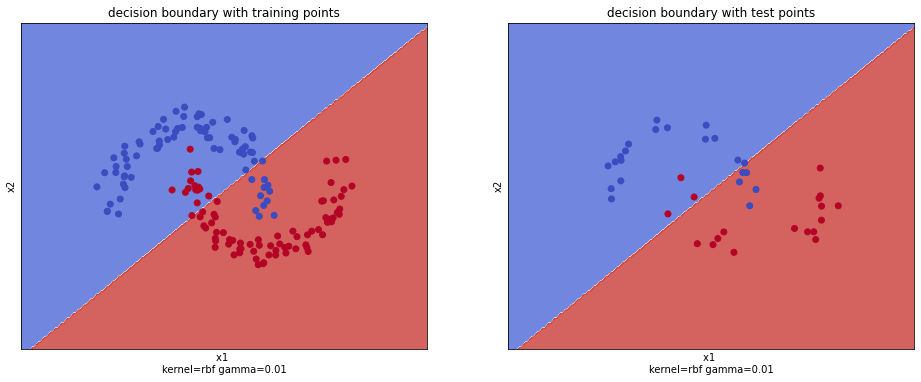

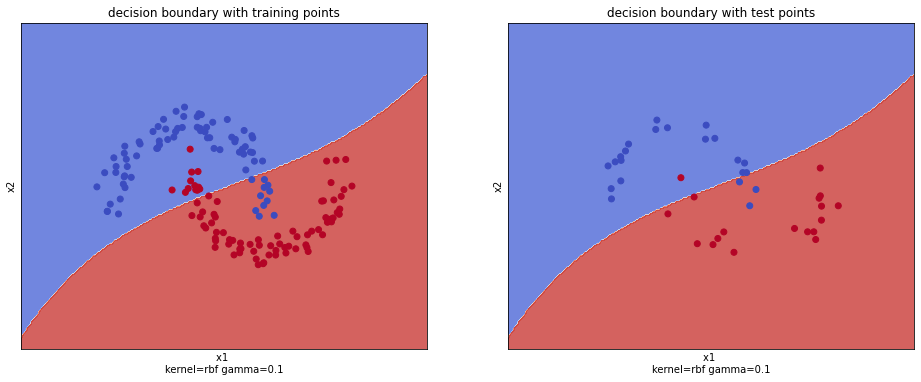

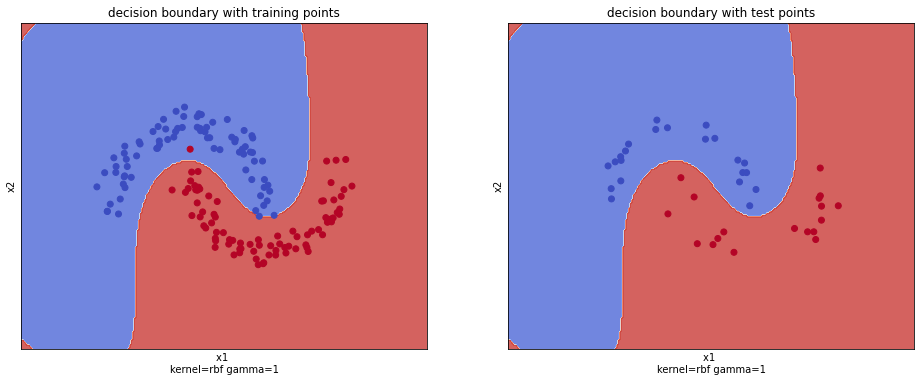

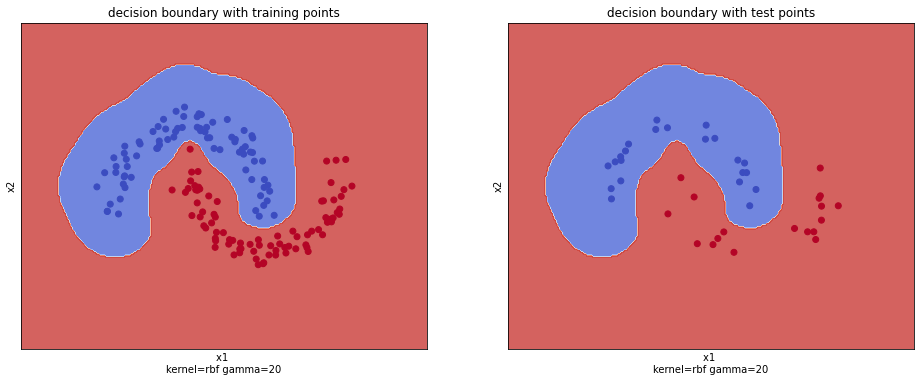

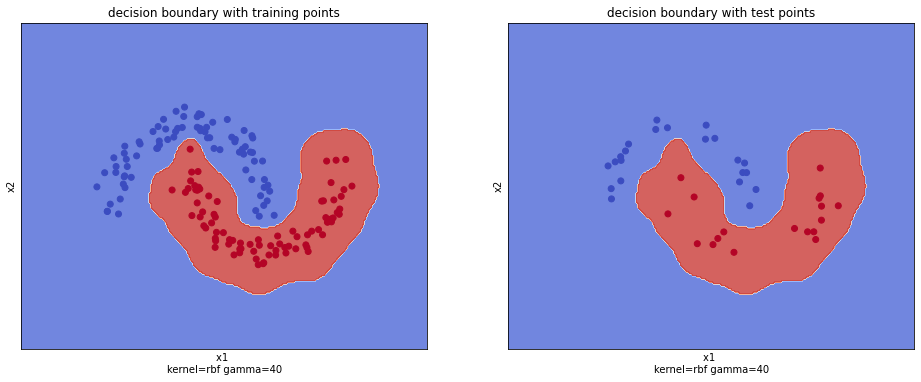

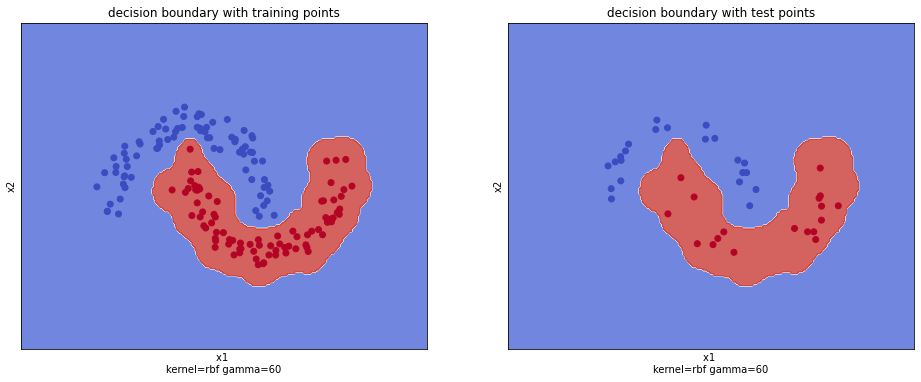

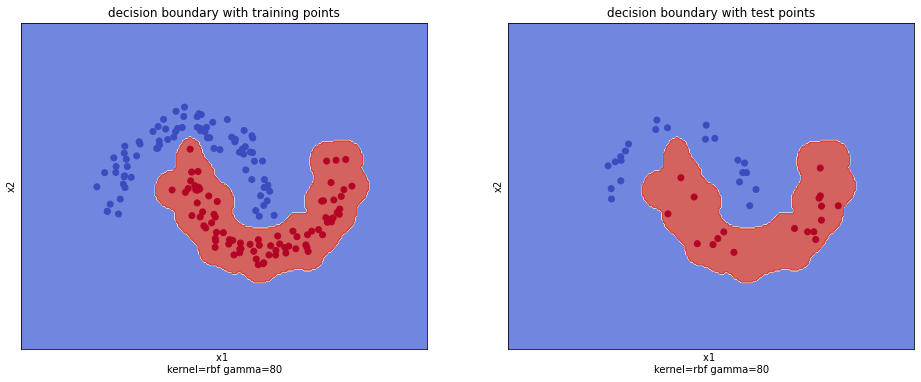

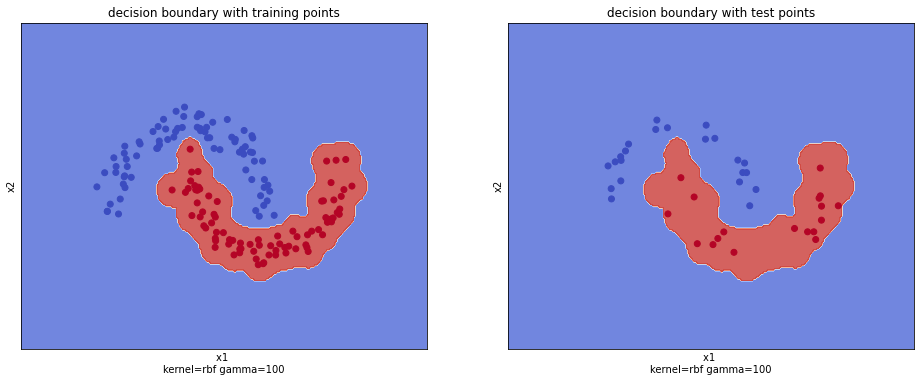

train accuracy: {0.0001: 51.25, 0.001: 51.25, 0.01: 83.125, 0.1: 85.625, 1: 98.75, 20: 100.0, 40: 100.0, 60: 100.0, 80: 100.0, 100: 100.0}
test accuracy: {0.0001: 44.99999999999999, 0.001: 44.99999999999999, 0.01: 80.0, 0.1: 90.0, 1: 100.0, 20: 100.0, 40: 100.0, 60: 100.0, 80: 100.0, 100: 100.0}


In [ ]:
# for creating a mesh to plot in
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

from sklearn.svm import SVC
gamma = [0.0001,0.001, 0.01, 0.1, 1, 20, 40, 60, 80, 100]
train_accuracy = {}
test_accuracy = {}
for gamma_ in gamma:
  clf = SVC(kernel='rbf', gamma=gamma_, max_iter = 10000)
  clf_model = clf.fit(train_X,train_y.ravel())
  predicted_labels = clf_model.predict(train_X)
  # print(predicted_labels)
  train_error = np.sum(0.5*np.abs(predicted_labels-train_y.ravel()))/len(train_y)*100.0
  train_accuracy[gamma_] = 100.0-train_error 
  predicted_test_labels = clf_model.predict(test_X)
  test_error = np.sum(0.5*np.abs(predicted_test_labels-test_y.ravel()))/len(test_y)*100.0
  test_accuracy[gamma_] = 100.0-test_error
  ## visualizing decision boundary
  Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx1.shape)

  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
  ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
  # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
  # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
  xlabel = 'x1 '+str('\n')+'kernel='+str(kernel_)+' gamma='+str(gamma_)
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel('x2')
  ax1.set_xlim(xx1.min(), xx1.max())
  ax1.set_ylim(xx2.min(), xx2.max())
  ax1.set_xticks(())
  ax1.set_yticks(())
  ax1.set_title('decision boundary with training points')

  #plot the test points along with decision boundaries
  ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
  # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
  # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
  xlabel = 'x1 '+str('\n')+'kernel='+str(kernel_)+' gamma='+str(gamma_)
  ax2.set_xlabel(xlabel)
  ax2.set_ylabel('x2')
  ax2.set_xlim(xx1.min(), xx1.max())
  ax2.set_ylim(xx2.min(), xx2.max())
  ax2.set_xticks(())
  ax2.set_yticks(())
  ax2.set_title('decision boundary with test points')


  plt.show()
 
  
print('train accuracy:', train_accuracy)
print ('test accuracy:',test_accuracy)